In [3]:
import requests
from PIL import Image, ImageDraw
import torch
from transformers import OwlViTProcessor, OwlViTForObjectDetection

processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")


/Users/abdulkarim/Library/Caches/pypoetry/virtualenvs/logo-recognition-model-AxsmBhvB-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")

url = "https://www.destinyusa.com/wp-content/uploads/sites/7/2016/03/Vans-Storefront.jpg"
image = Image.open(requests.get(url, stream=True).raw)
texts = [["a photo of vans logo"]]
inputs = processor(text=texts, images=image, return_tensors="pt")
outputs = model(**inputs)

target_sizes = torch.Tensor([image.size[::-1]])
results = processor.post_process_object_detection(
    outputs=outputs, target_sizes=target_sizes, threshold=0.03
)
i = 0  # Retrieve predictions for the first image for the corresponding text queries
text = texts[i]
boxes, scores, labels = results[i]["boxes"], results[i]["scores"], results[i]["labels"]

# Create a draw object
draw = ImageDraw.Draw(image)

# Draw each bounding box
for box, score, label in zip(boxes, scores, labels):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {text[label]} with confidence {round(score.item(), 3)} at location {box}"
    )
    # Draw the bounding box on the image
    draw.rectangle(box, outline="red")



Detected a photo of vans logo with confidence 0.032 at location [64.57, 335.39, 187.36, 442.42]


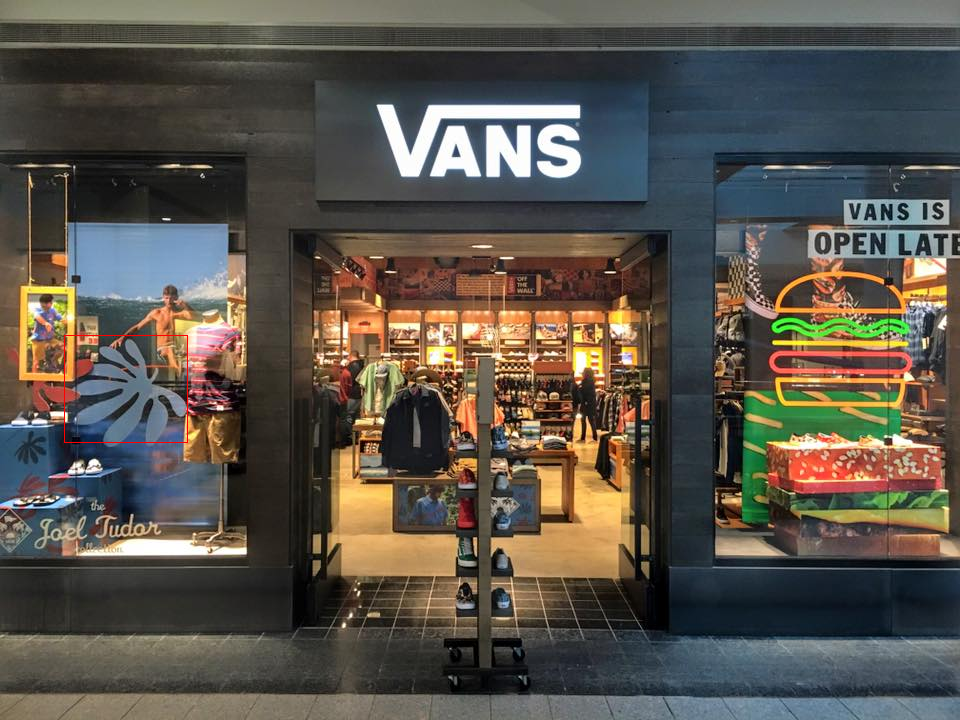

In [34]:
# Display the image
image